In [1]:
import numpy as np
import pandas as pd
import xgboost as xgb
import shap

import src.feature_engineering as fe

In [2]:
df = pd.read_csv('data/Train_gold.csv')
df.head()

,Ang,ReL,ReG,FrL,FrG,NL,X_LM,X_LM_2,Y,We,Eo,HU,K_G,T_TB,Flow_label
0,70.0,24466.450000,4732.370333,1.977684,0.167038,0.067433,9.536429,90.943470,9396.899099,342.061243,87.456055,0.855173,26.127659,0.009094,2
1,15.0,41756.000000,771.757367,3.375242,0.027241,0.108119,27.565536,759.858750,8411.876527,996.322021,87.456055,0.855671,5.566427,0.023380,2
2,-1.0,40000.000000,31.466667,3.233300,0.001111,0.104080,131.415812,17270.115534,-13911.758220,914.285714,87.456055,0.869445,0.222135,0.021665,1
3,0.0,1967.834702,9344.647280,1.237211,0.121114,0.111560,23.916428,571.995542,0.000000,267.242284,174.589416,0.705758,5.372648,0.024891,2
4,0.0,3847.587937,438975.247408,0.394137,1.052936,0.017198,0.648012,0.419920,0.000000,235.178898,1513.924625,0.150659,65.312469,0.000592,0


In [3]:
df = pd.read_csv('data/Train_bronze.csv') #Train Dataset
kept_columns = ['Ang', 'FrL', 'FrG', 'X_LM_2', 'Eo', 'Flow_label'] #Kept Columns (from SFFS)
df = fe.bronze_to_gold(df)[kept_columns]
df.head()

,Ang,FrL,FrG,X_LM_2,Eo,Flow_label
0,70.0,1.977684,0.167038,90.943470,87.456055,2
1,15.0,3.375242,0.027241,759.858750,87.456055,2
2,-1.0,3.233300,0.001111,17270.115534,87.456055,1
3,0.0,1.237211,0.121114,571.995542,174.589416,2
4,0.0,0.394137,1.052936,0.419920,1513.924625,0


In [4]:
target_col = 'Flow_label'
features_columns = [c for c in df.columns if c not in [target_col]]
X, y = df[features_columns].values, df[target_col].values

In [5]:
model = xgb.XGBClassifier(use_label_encoder=False)
model.fit(X, y)

[22:19:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [6]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


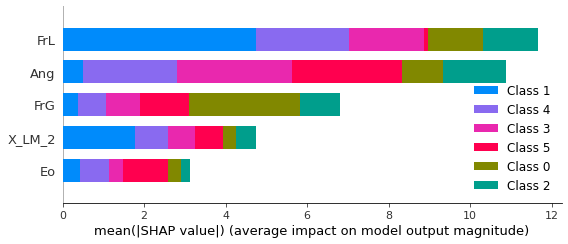

In [7]:
shap.summary_plot(shap_values, X, plot_type="bar", feature_names=features_columns)

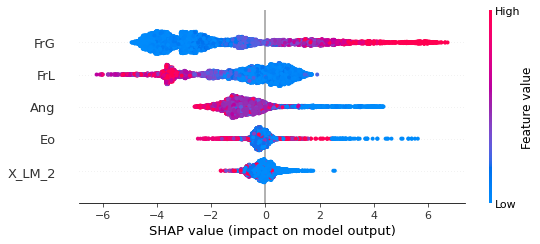

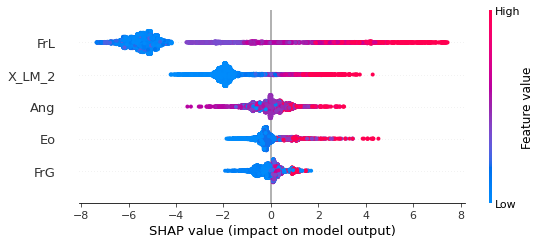

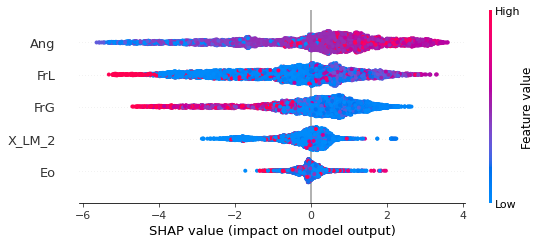

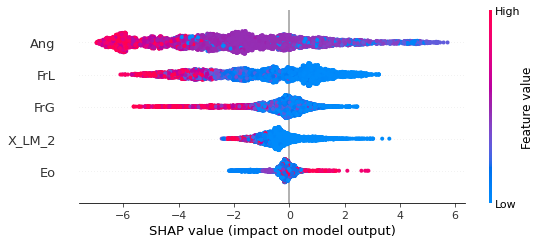

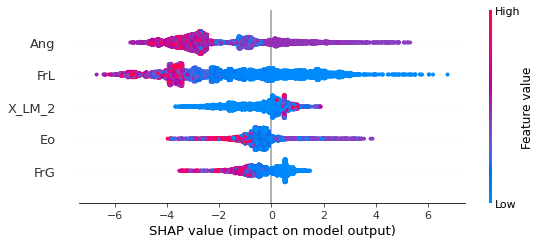

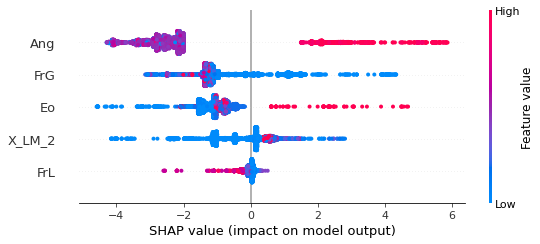

In [12]:
# Local class interpretability
for i in range(6):
    shap.summary_plot(shap_values[i], X, feature_names = features_columns)

In [13]:
i=42
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[0][i], X[i], feature_names = features_columns)